## 용어 정리
* 함수 $y = ax + b$는 공부한 시간과 성적의 관계를 유추하기 위해 필요했던 식
* 기울기 $a$는 변수 $x$에 어느 정도의 가중치를 곱하는지 결정하므로, **가중치(weight)** 라고 하며, $w$로 표시
* 절편 $b$는 데이터의 특성에 따라 따로 부여되는 값이므로 **편향(bias)** 이라고 하며, $b$로 표시
* $ H(x) = wx + b $
* 평균 제곱 오차 -> 손실 함수(loss function)
* 최적의 기울기와 절편을 찾기 위해 앞서 경사 하강법 -> 옵티마이저(optimizer)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## 선형회귀

In [4]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [5]:
model = Sequential()

# 출력 값, 입력 변수, 분석 방법에 맞게끔 모델을 설정합니다.
model.add(Dense(1, input_dim=1, activation='linear'))

# 오차 수정을 위해 경사 하강법(sgd)을, 오차의 정도를 판단하기 위해
# 평균 제곱 오차(mse)를 사용합니다.
model.compile(optimizer='sgd', loss='mse')

# 오차를 최소화하는 과정을 2000번 반복합니다.
model.fit(x, y, epochs=2000, verbose=False)

1/1 [==============================] - 0s 79ms/step


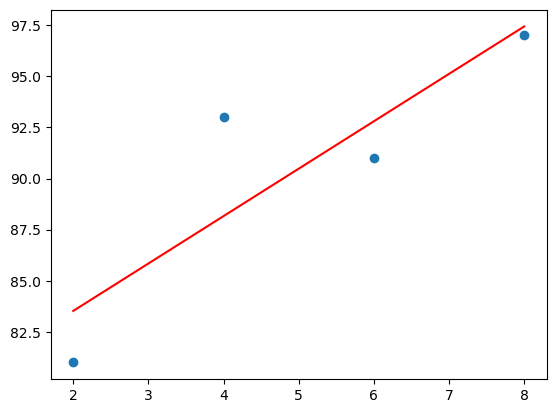

1/1 [==============================] - 0s 45ms/step
7시간을 공부할 경우의 예상 점수는 95.12점입니다.


In [6]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')    # 예측 결과를 그래프로 나타냅니다.
plt.show()

# 임의의 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.
hour = 7
prediction = model.predict([hour])
print("%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다." % (hour, prediction))

## 다중선형회귀

In [7]:
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97])

In [8]:
model = Sequential()

# 입력 변수가 두 개(학습 시간, 과외 시간)이므로 input_dim에 2를 입력합니다.
model.add(Dense(1, input_dim=2, activation='linear'))
model.compile(optimizer='sgd', loss='mse')

model.fit(x, y, epochs=2000, verbose=False)

In [9]:
# 임의의 학습 시간과 과외 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.
hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])

print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다." % (hour, private_class, prediction))

1/1 [==============================] - 0s 116ms/step
7시간을 공부하고 4시간의 과외를 받을 경우, 예상 점수는 97.53점입니다.
